#### Even though I am not new to Data Preprocessing and EDA, I still require a lot of practice since I lack in it, so any sort of advice is always welcome in the discussion section.

##### NOTE: This notebook is still undergoing some changes.

# Importing required libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genshin-impact-character-data/genshin.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
sns.set_theme(style="darkgrid")

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Analysing Dataset

In [3]:
path = '../input/genshin-impact-character-data/genshin.csv'
genshin_df = pd.read_csv(path)
genshin_df = genshin_df.drop(53)
genshin_df.head(3)

,character_name,playable,rarity,vision,region,model,constellation,birthday,special_dish,voice_eng,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,Y,5.0,Geo,Mondstadt,Medium Male,Princeps Cretaceus,9/13,Woodland Dream,Khoi Dao,...,1030.0,20.0,68.0,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
1,Aloy,Y,5.0,Cryo,NaN,Medium Female,Nora Fortis,4/4,Satiety Gel,Giselle Fernandez,...,848.0,18.0,53.0,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
2,Amber,Y,4.0,Pyro,Mondstadt,Medium Female,Lepus,8/10,Outrider's Champion Steak!,Kelly Baskin,...,793.0,19.0,50.0,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%


In [4]:
def basic_info(df):
    """
    Get basic information about the dataset including shape, datatypes, statistics, null values and duplicated values.
    """
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(df.describe())
    
def check_duplicate(df):
    print('='*50)
    if df.duplicated().any():
        print(df[df.duplicated()])
    else:
        print('No duplicated values found!')
    print("="*50)

def check_null(df):
    a = df.isnull().sum() 
    if a[a>0].any():
        print(a[a>0])
    else:
        print('No null values found!')
            
            
def check_unique(df):
    print(df.nunique())
    for col in df.columns:
        b = df[col].unique()
        if len(b)<12:
            print(f'{col} has {len(b)} unique values ->> {b}', end = '\n\n')
    

In [5]:
basic_info(genshin_df)

Shape of this dataset is (53, 72).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 72 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   character_name        53 non-null     object 
 1   playable              53 non-null     object 
 2   rarity                52 non-null     float64
 3   vision                53 non-null     object 
 4   region                50 non-null     object 
 5   model                 53 non-null     object 
 6   constellation         53 non-null     object 
 7   birthday              50 non-null     object 
 8   special_dish          50 non-null     object 
 9   voice_eng             51 non-null     object 
 10  voice_cn              51 non-null     object 
 11  voice_jp              51 non-null     object 
 12  voice_kr              51 non-null     object 
 13  release_date          50 non-null     object 
 14  weapon_type           52 non-null     obj

In [6]:
check_null(genshin_df)

rarity          1
region          3
birthday        3
special_dish    3
voice_eng       2
               ..
special_2       3
special_3       3
special_4       3
special_5       3
special_6       3
Length: 67, dtype: int64


In [7]:
check_duplicate(genshin_df)

No duplicated values found!


In [8]:
check_unique(genshin_df)

character_name    53
playable           2
rarity             2
vision             8
region             5
                  ..
special_2         10
special_3         10
special_4         10
special_5         10
special_6         10
Length: 72, dtype: int64
playable has 2 unique values ->> ['Y' 'N']

rarity has 3 unique values ->> [ 5.  4. nan]

vision has 8 unique values ->> ['Geo' 'Cryo' 'Pyro' 'Hydro' 'Electro' 'Unknown' 'Anemo' 'None']

region has 6 unique values ->> ['Mondstadt' nan 'Inazuma' 'Liyue' "Khaenri'ah" 'Snezhnaya']

model has 5 unique values ->> ['Medium Male' 'Medium Female' 'Tall Male' 'Tall Female' 'Short Female']

weapon_type has 6 unique values ->> ['Sword' 'Bow' 'Claymore' 'Catalyst' nan 'Polearm']

ascension_talent_mat has 10 unique values ->> ['Divining Scroll' 'Spectral Husk' 'Firm Arrowhead' 'Slime Condensate'
 'Treasure Hoarder Insignia' 'Damaged Mask' nan "Recruit's Insignia"
 'Whopperflower Nectar' 'Old Handguard']

talent_book_1 has 11 unique values ->> ['Te

## Date - Time

In [9]:
genshin_df['release_date'] = pd.to_datetime(genshin_df['release_date'])

## Dealing with Categorical Missing Values

### Dealing with NaN i.e., regions of Travelers and Aloy
#### Replacing them with 'Outlander' (I am aware it's a title) because that is closer to being from 'Another World'

In [10]:
genshin_df[genshin_df['region'].isnull()]

,character_name,playable,rarity,vision,region,model,constellation,birthday,special_dish,voice_eng,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
1,Aloy,Y,5.0,Cryo,NaN,Medium Female,Nora Fortis,4/4,Satiety Gel,Giselle Fernandez,...,848.0,18.0,53.0,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
40,Traveler (Aether),Y,5.0,None,NaN,Medium Female,Viator,Player's Choice,None,Sarah Miller-Crews,...,912.0,18.0,57.0,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
41,Traveler (Lumine),Y,5.0,None,NaN,Medium Male,Viatrix,Player's Choice,None,Zach Aguilar,...,912.0,18.0,57.0,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%


In [11]:
genshin_df['region'] = genshin_df['region'].fillna('Outlander')

### Replacing NaN with 'Unknown' in categorical columns of non playable characters

In [12]:
genshin_df[genshin_df['playable'] == 'N'][['character_name','vision','rarity','weapon_type', 'talent_book_1', 'talent_book_2','talent_book_3']]

,character_name,vision,rarity,weapon_type,talent_book_1,talent_book_2,talent_book_3
8,Dainsleif,Unknown,NaN,NaN,NaN,NaN,NaN
24,Kuki Shinobu,Electro,4.0,Sword,NaN,NaN,NaN
36,Shikanoin Heizou,Anemo,4.0,Catalyst,NaN,NaN,NaN


In [13]:
# weapon_type = 'Unknown'
genshin_df['weapon_type'] = genshin_df['weapon_type'].fillna('Unknown')

In [14]:
genshin_df['rarity'] = genshin_df['rarity'].fillna(0.0)

In [15]:
genshin_df[genshin_df['rarity'].isnull()]

,character_name,playable,rarity,vision,region,model,constellation,birthday,special_dish,voice_eng,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6


### Multiple values to singled values & Correcting the error of 'Pholosophies of Resistance'

In [16]:
genshin_df[genshin_df['vision']=='None'][['talent_book_3']]

,talent_book_3
40,"Philosophies of Ballad, Philosophies of Freedo..."
41,"Philosophies of Ballad, Philosophies of Freedo..."


In [17]:
genshin_df['talent_book_3'] = genshin_df['talent_book_3'].astype('str')
genshin_df['talent_book_3'] = genshin_df['talent_book_3'].str.split(', ')

In [18]:
genshin_df = genshin_df.explode('talent_book_3')
genshin_df = genshin_df.reset_index(drop=True)

In [19]:
genshin_df[genshin_df['vision']=='None'][['talent_book_3']]

,talent_book_3
40,Philosophies of Ballad
41,Philosophies of Freedom
42,Pholosophies of Resistance
43,Philosophies of Light
44,Philosophies of Transience
45,Philosophies of Elegance
46,Philosophies of Ballad
47,Philosophies of Freedom
48,Pholosophies of Resistance
49,Philosophies of Light


### Correcting the spelling error

In [20]:
genshin_df = genshin_df.replace(to_replace='Pholosophies of Resistance', value='Philosophies of Resistance')

In [21]:
# genshin_df[genshin_df['talent_book_3'] == 'nan'][['character_name','talent_books','talent_book_1', 'talent_book_2','talent_book_3']]

#### Gorou's talent books were missing in the dataset

In [22]:
genshin_df[genshin_df['character_name'] == 'Gorou'][['character_name','talent_book_1', 'talent_book_2','talent_book_3']]

,character_name,talent_book_1,talent_book_2,talent_book_3
14,Gorou,Teachings of Light,NaN,nan


In [23]:
genshin_df.loc[14, 'talent_book_3'] = 'Philosophies of Light'

In [24]:
genshin_df['talent_book_3'] = genshin_df['talent_book_3'].replace('nan', 'Unknown')

In [25]:
# %%timeit

def replace_talent_books(df, col, key):
    df[col] = df['talent_book_3']
    df[col] = df[col].apply(lambda x: x[15:])
    df[col] = key + df[col]

replace_talent_books(genshin_df, 'talent_book_1', 'Teachings of')
replace_talent_books(genshin_df, 'talent_book_2', 'Guide to')

In [26]:
genshin_df[genshin_df['vision']=='None'][['talent_book_1', 'talent_book_2','talent_book_3']]

,talent_book_1,talent_book_2,talent_book_3
40,Teachings of Ballad,Guide to Ballad,Philosophies of Ballad
41,Teachings of Freedom,Guide to Freedom,Philosophies of Freedom
42,Teachings of Resistance,Guide to Resistance,Philosophies of Resistance
43,Teachings of Light,Guide to Light,Philosophies of Light
44,Teachings of Transience,Guide to Transience,Philosophies of Transience
45,Teachings of Elegance,Guide to Elegance,Philosophies of Elegance
46,Teachings of Ballad,Guide to Ballad,Philosophies of Ballad
47,Teachings of Freedom,Guide to Freedom,Philosophies of Freedom
48,Teachings of Resistance,Guide to Resistance,Philosophies of Resistance
49,Teachings of Light,Guide to Light,Philosophies of Light


Realized that there was no need of levels of talent books, the categories will be same

In [27]:
genshin_df['talent_books'] = genshin_df['talent_book_3'].apply(lambda x: x[16:])

In [28]:
# genshin_df[genshin_df['character_name'] == 'Gorou'][['character_name','rarity','weapon_type', 'talent_book_1', 'talent_book_2','talent_book_3']]

In [29]:
genshin_df[genshin_df['talent_books']==''][['talent_book_1', 'talent_book_2','talent_book_3']]

,talent_book_1,talent_book_2,talent_book_3
8,Teachings of,Guide to,Unknown
24,Teachings of,Guide to,Unknown
36,Teachings of,Guide to,Unknown


#### Here the non playable characters got the additional string values from the function above. Hence removed them manually.

In [30]:
index = [8,24,36]
for i in index:
    genshin_df.loc[i, 'talent_book_1'] = 'Unknown'
    genshin_df.loc[i, 'talent_book_2'] = 'Unknown'

In [31]:
genshin_df['talent_books'] = genshin_df['talent_books'].replace('', 'Unknown')

### Changing Playable to 1 and Non Playable characters to 0

In [32]:
genshin_df['Playable'] = np.where(genshin_df['playable']=='Y', 1, 0)


# EDA

In [33]:
genshin_df.columns

Index(['character_name', 'playable', 'rarity', 'vision', 'region', 'model',
       'constellation', 'birthday', 'special_dish', 'voice_eng', 'voice_cn',
       'voice_jp', 'voice_kr', 'release_date', 'weapon_type', 'ascension',
       'ascension_specialty', 'ascension_talent_mat', 'ascension_boss_mat',
       'talent_book_1', 'talent_book_2', 'talent_book_3', 'talent_weekly',
       'hp_90_90', 'atk_90_90', 'def_90_90', 'hp_80_90', 'atk_80_90',
       'def_80_90', 'hp_80_80', 'atk_80_80', 'def_80_80', 'hp_70_80',
       'atk_70_80', 'def_70_80', 'hp_70_70', 'atk_70_70', 'def_70_70',
       'hp_60_70', 'atk_60_70', 'def_60_70', 'hp_60_60', 'atk_60_60',
       'def_60_60', 'hp_50_60', 'atk_50_60', 'def_50_60', 'hp_50_50',
       'atk_50_50', 'def_50_50', 'hp_40_50', 'atk_40_50', 'def_40_50',
       'hp_40_40', 'atk_40_40', 'def_40_40', 'hp_20_40', 'atk_20_40',
       'def_20_40', 'hp_20_20', 'atk_20_20', 'def_20_20', 'hp_1_20',
       'atk_1_20', 'def_1_20', 'spsecial_0', 'special_1', 's

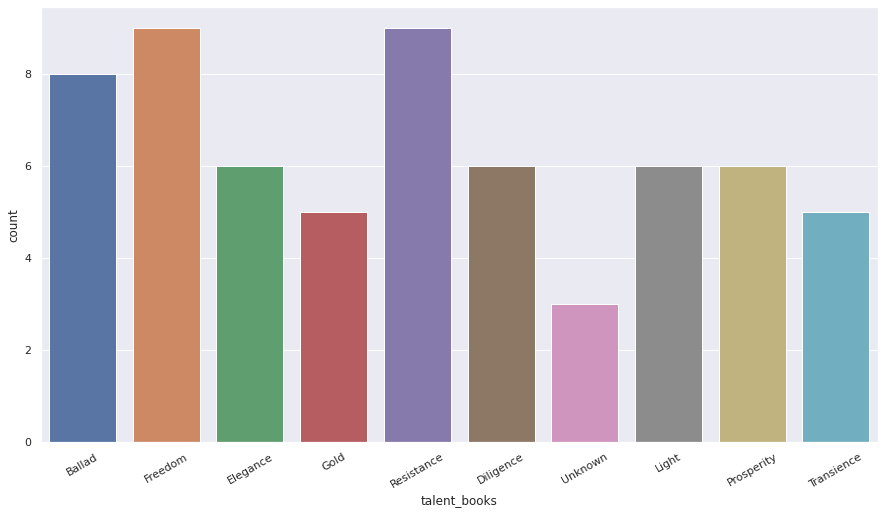

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(x=genshin_df.talent_books)
plt.xticks(rotation=30);


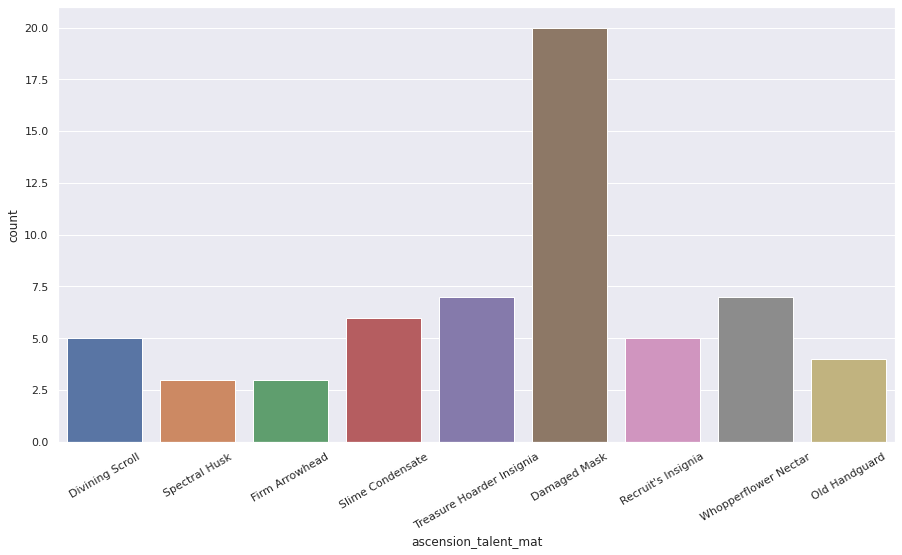

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x=genshin_df.ascension_talent_mat)
plt.xticks(rotation=30);


<AxesSubplot:xlabel='playable', ylabel='count'>

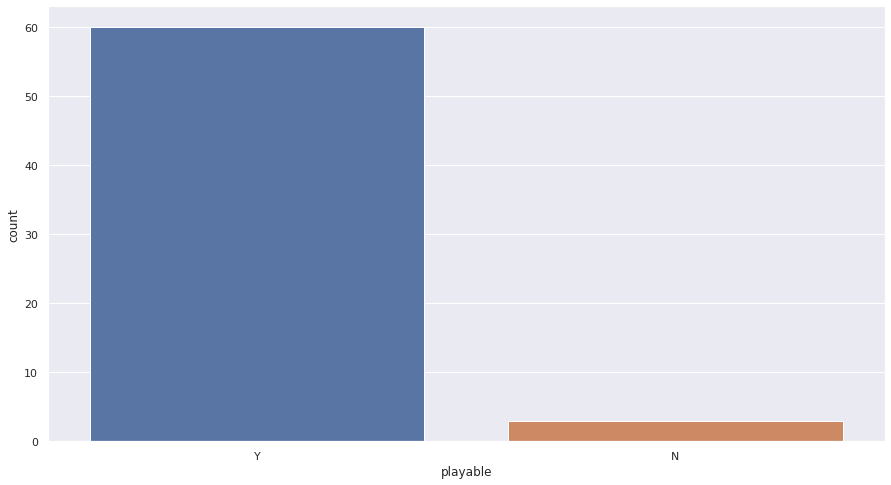

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x=genshin_df.playable)
# plt.xticks(rotation=30);


### Region wise - Vision and Weapon distribution

In [37]:
genshin_region_type_wise = genshin_df.groupby(['region', 'vision'])[['weapon_type']].nunique().reset_index()
genshin_region_type_wise

,region,vision,weapon_type
0,Inazuma,Anemo,3
1,Inazuma,Cryo,1
2,Inazuma,Electro,4
3,Inazuma,Geo,2
4,Inazuma,Hydro,2
5,Inazuma,Pyro,2
6,Khaenri'ah,Unknown,1
7,Liyue,Anemo,1
8,Liyue,Cryo,4
9,Liyue,Electro,2


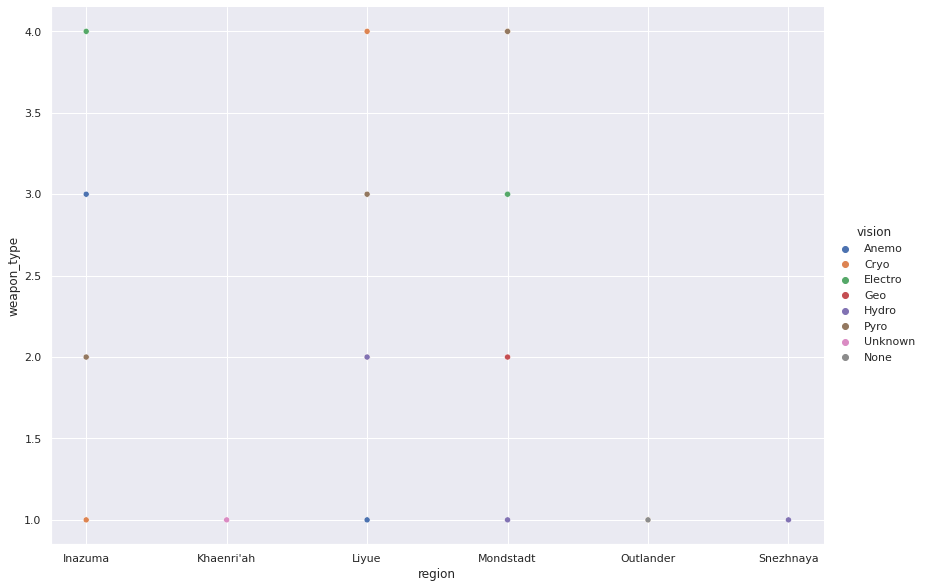

In [38]:
# plt.figure(figsize=(15,8))
fig = sns.relplot(x="region", y="weapon_type", hue="vision", data=genshin_region_type_wise, height=8.27, aspect=11.7/8.27)

- The above graph displays the vision and weapon type distribution among the regions.
<br> 
- For example, in Mondstadt, there are 3 different types of weapons (catalyst - Lisa, claymore - Razor, bow - Fischl) found associated with Electro vision.

### Playable character and their vision count over region 

In [39]:
def vision_count(genshin_df):
    return genshin_df.vision.count()
    

genshin_region_count_wise = genshin_df.groupby(['playable', 'vision'])[['vision']].agg(vision_count).reset_index().rename(columns={0:'vision_count'})
genshin_region_count_wise

,playable,vision,vision_count
0,N,Anemo,1
1,N,Electro,1
2,N,Unknown,1
3,Y,Anemo,6
4,Y,Cryo,10
5,Y,Electro,8
6,Y,Geo,7
7,Y,Hydro,7
8,Y,None,12
9,Y,Pyro,10


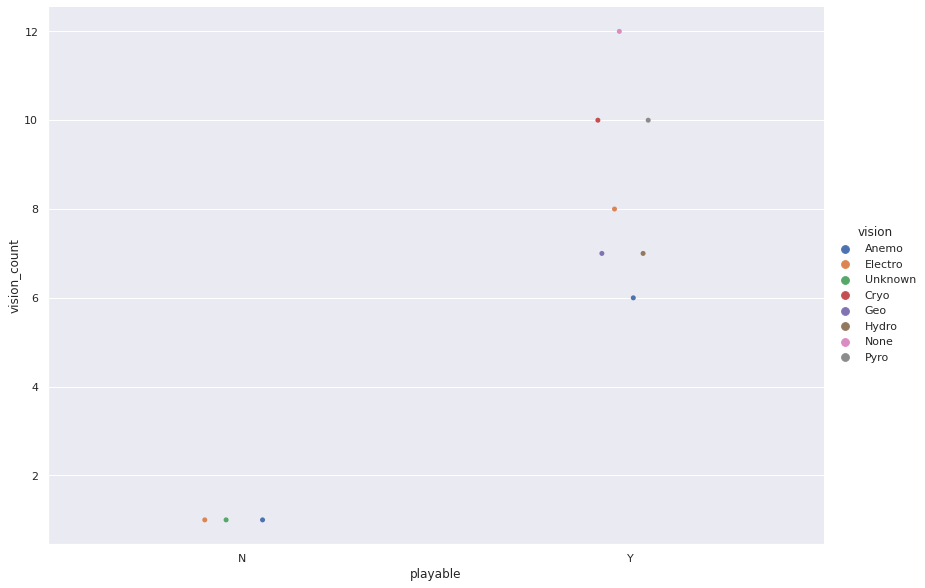

In [40]:
fig2 = sns.catplot(x="playable", y='vision_count', hue="vision", data=genshin_region_count_wise, height=8.27, aspect=11.7/8.27)

Observations: 6 playable characters are Anemo vision holders, similarly we can find number of playable or non playable characters with specific visions in the game

In [41]:
genshin_vision_wise = genshin_df.groupby(['vision', 'playable','rarity'])[['region' ,'weapon_type','talent_books','ascension_talent_mat']].nunique().reset_index()
genshin_vision_wise

,vision,playable,rarity,region,weapon_type,talent_books,ascension_talent_mat
0,Anemo,N,4.0,1,1,1,0
1,Anemo,Y,4.0,2,2,2,1
2,Anemo,Y,5.0,3,3,4,3
3,Cryo,Y,4.0,2,4,3,4
4,Cryo,Y,5.0,4,4,5,5
5,Electro,N,4.0,1,1,1,0
6,Electro,Y,4.0,3,3,4,4
7,Electro,Y,5.0,2,3,2,2
8,Geo,Y,4.0,3,4,4,3
9,Geo,Y,5.0,3,3,3,2


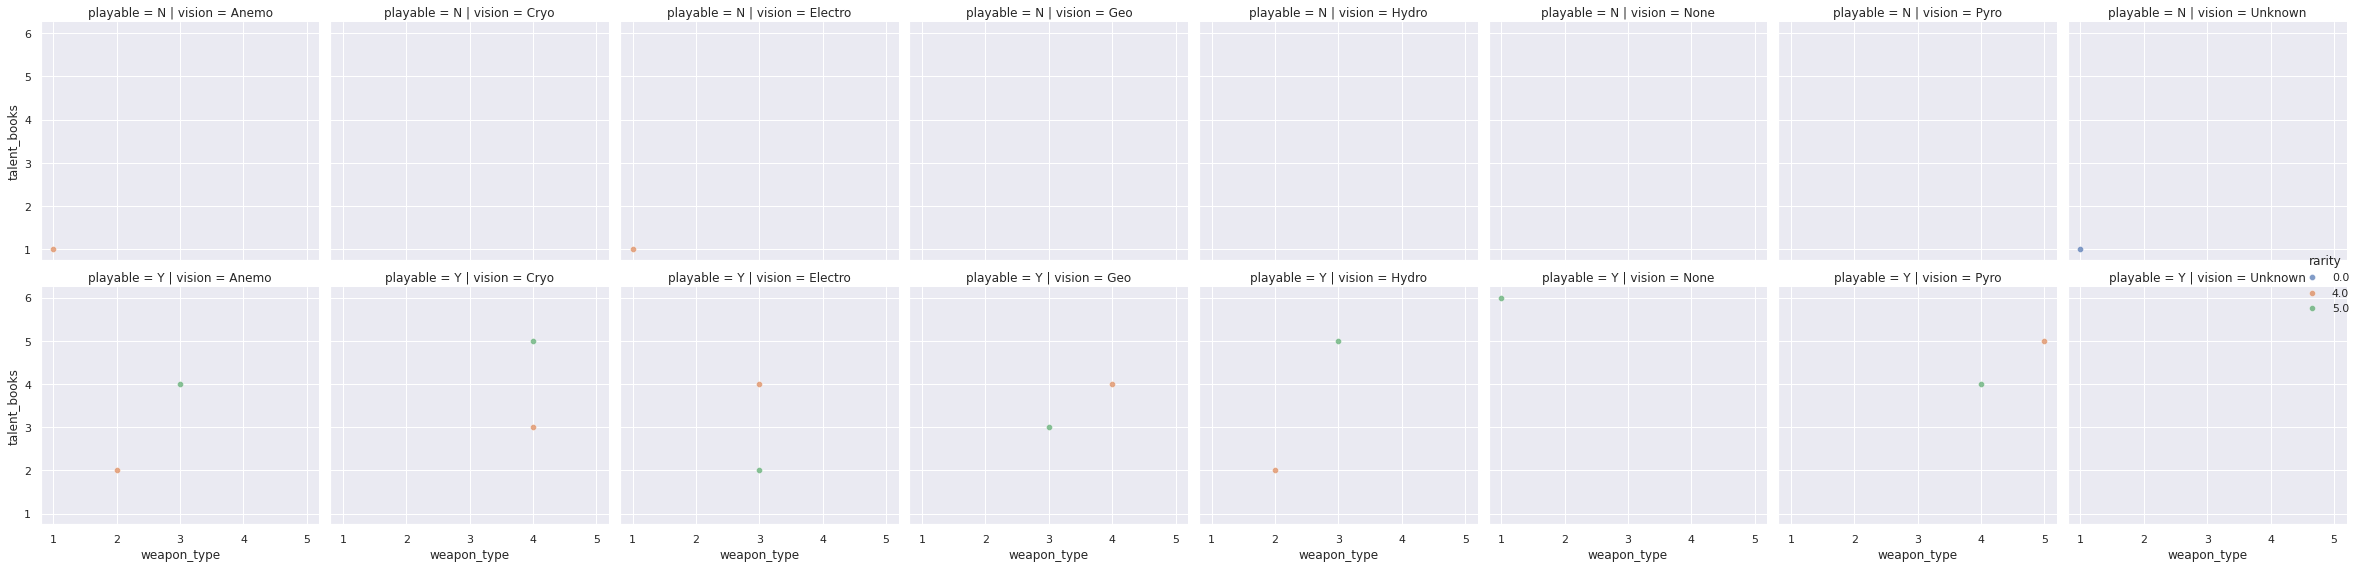

In [42]:
g = sns.FacetGrid(genshin_vision_wise, col="vision", row='playable', hue="rarity", height=4)
g.map(sns.scatterplot, "weapon_type", "talent_books", alpha=.7)
g.add_legend()
plt.tight_layout()
plt.show()

In [43]:
# fig5 = px.scatter(genshin_vision_wise, x='vision', y='talent_books', color='playable', size='weapon_type')
# fig5.show()

In [44]:
release_date_wise = genshin_df.groupby(['release_date'])[['vision', 'rarity','region','weapon_type','talent_books','ascension_talent_mat']].nunique().reset_index()
release_date_wise

,release_date,vision,rarity,region,weapon_type,talent_books,ascension_talent_mat
0,2020-09-28,7,2,3,5,9,7
1,2020-10-20,1,1,1,1,1,1
2,2020-11-11,2,2,2,1,1,2
3,2020-12-01,2,2,1,2,1,2
4,2020-12-23,1,1,1,1,1,1
5,2021-01-12,1,1,1,1,1,1
6,2021-02-03,1,1,1,1,1,1
7,2021-03-02,1,1,1,1,1,1
8,2021-04-06,1,1,1,1,1,1
9,2021-04-28,1,1,1,1,1,1


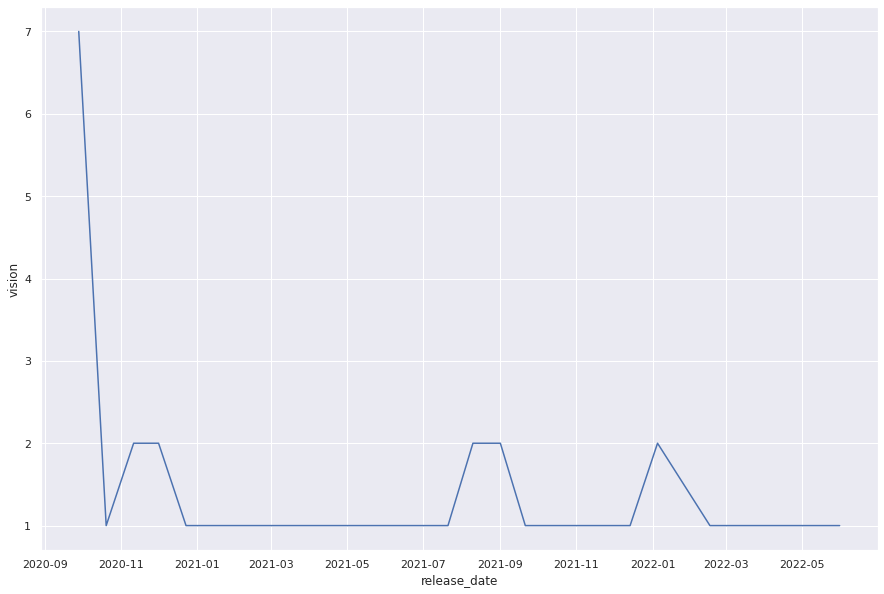

In [45]:
plt.figure(figsize=(15,10))
fig3 = sns.lineplot(data = release_date_wise, x='release_date', y='vision')

- 7 different types of vision characters (Anemo, Pyro, Hydro, Electro, Cryo, Geo, None - Mondstand and most Liyue characters) were released in September 2020. 
<br>
- While latest May 2022 was the release of 1 new Hydro 5 star character - Yelan.
<br>
- Also to note, Inazuma was introduced around July 2021 (aka Update 2.0). Hence the spike in new characters in the graph belongs to new Inazuma characters of varying visions (Yoimiya, Raiden Shogun, Sayu, Ayaka, Sara, Kokomi, etc).

In [46]:
rarity_wise = genshin_df.groupby(['rarity', 'vision'])[['region','weapon_type','talent_books','ascension_talent_mat']].nunique().reset_index()
rarity_wise

,rarity,vision,region,weapon_type,talent_books,ascension_talent_mat
0,0.0,Unknown,1,1,1,0
1,4.0,Anemo,2,2,3,1
2,4.0,Cryo,2,4,3,4
3,4.0,Electro,3,4,5,4
4,4.0,Geo,3,4,4,3
5,4.0,Hydro,2,2,2,2
6,4.0,Pyro,3,5,5,3
7,5.0,Anemo,3,3,4,3
8,5.0,Cryo,4,4,5,5
9,5.0,Electro,2,3,2,2


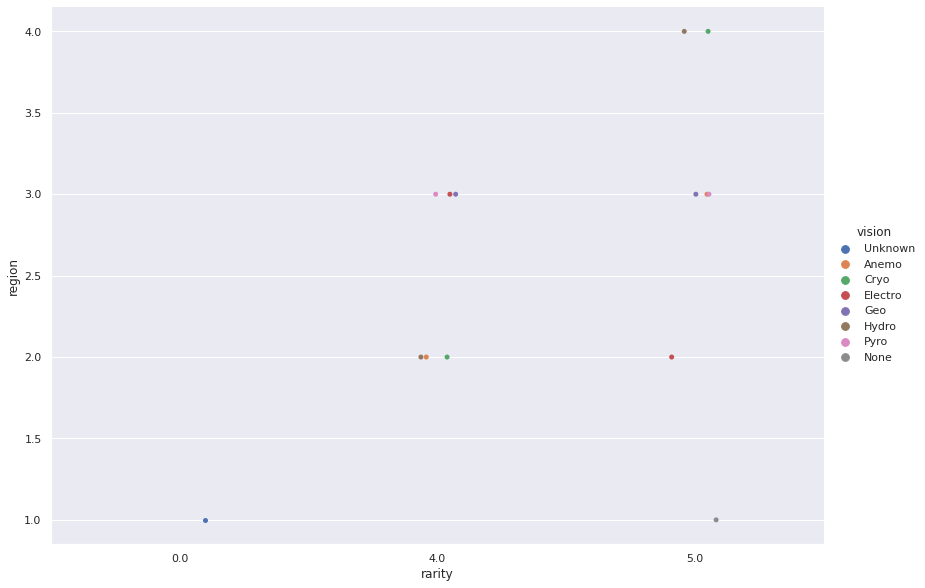

In [47]:
fig4 = sns.catplot(x="rarity", y='region', hue="vision", data=rarity_wise, height=8.27, aspect=11.7/8.27)